In [2]:
!pip install python_aqi

import aqi

pm25 = 12.0
pm10 = 24.0
o3_8h = 0.087

aqi_val = aqi.to_aqi([
    (aqi.POLLUTANT_PM25, pm25),
    (aqi.POLLUTANT_PM10, pm10),
    (aqi.POLLUTANT_O3_8H, o3_8h)
])

print(f"AQI: {aqi_val}")

  Preparing metadata (setup.py) ... done
  Created wheel for python_aqi: filename=python_aqi-0.6.1-py3-none-any.whl size=9648 sha256=9b635ecb6358d6a7aba54e428487fb8b6fcd1ae8e905bf94e65332b0cefdad10
  Stored in directory: /root/.cache/pip/wheels/e9/d6/44/a99d668809df30b3958b40ca640b825a62be4f91880111dc8b
Successfully built python_aqi
AQI: 127


In [3]:
import pandas as pd
year = input("enter year: ")
month = input("enter month: ")
date =input("enter date: ")

file_name = 'clean_'+year+month+date+'.csv'
print(file_name)

enter year: 2021
enter month: 12
enter date: 24
clean_20211224.csv


In [5]:
data = pd.read_csv(file_name,index_col=None)

In [6]:
data.corr()


,hour,temp(F),humidity,AQI,PM1,PM2.5,PM10
hour,1.000000,0.785907,0.839149,-0.004949,-0.079101,0.013651,0.018911
temp(F),0.785907,1.000000,0.458021,-0.571175,-0.628947,-0.554170,-0.541766
humidity,0.839149,0.458021,1.000000,0.391947,0.275013,0.404243,0.435840
AQI,-0.004949,-0.571175,0.391947,1.000000,0.984325,0.999407,0.996275
PM1,-0.079101,-0.628947,0.275013,0.984325,1.000000,0.984141,0.967185
PM2.5,0.013651,-0.554170,0.404243,0.999407,0.984141,1.000000,0.995675
PM10,0.018911,-0.541766,0.435840,0.996275,0.967185,0.995675,1.000000


In [7]:
data

,hour,temp(F),humidity,AQI,PM1,PM2.5,PM10
0,0,42.206897,51.206897,74.827586,15.105862,23.448276,26.645172
1,1,42.333333,51.366667,81.466667,17.470000,26.582333,30.720667
2,2,41.266667,52.500000,91.900000,20.154000,31.453333,37.000333
3,3,39.966667,54.133333,100.666667,22.989000,35.400000,41.405667
4,4,39.600000,55.333333,112.833333,26.356333,40.306000,48.979000
5,5,39.000000,56.666667,114.766667,26.774000,41.073667,50.033667
6,6,37.900000,58.800000,121.466667,28.334333,43.830000,54.793667
7,7,38.233333,62.100000,125.766667,28.790000,45.567667,57.950667
8,8,38.266667,62.200000,128.666667,29.682667,46.765000,59.567000
9,9,37.233333,65.066667,132.166667,30.250000,48.140333,61.433000


In [8]:
def PM25_aqi(PM25):

  if PM25<=12:
    I_hi = 50
    I_lo = 0
    BP_hi = 12
    BP_lo = 0
    C_p = PM25
  elif PM25<=35.4:
    I_hi = 100
    I_lo = 51
    BP_hi = 35.4
    BP_lo = 12.1
    C_p = PM25
  elif PM25<=55.4:
    I_hi = 150
    I_lo = 101
    BP_hi = 55.4
    BP_lo = 35.5
    C_p = PM25
  elif PM25<=150.4:
    I_hi = 200
    I_lo = 151
    BP_hi = 150.4
    BP_lo = 55.5
    C_p = PM25
  elif PM25<=250.4:
    I_hi = 300
    I_lo = 201
    BP_hi = 250.4
    BP_lo = 150.5
    C_p = PM25
  elif PM25<=350.4:
    I_hi = 400
    I_lo = 301
    BP_hi = 350.4
    BP_lo = 250.5
    C_p = PM25
  elif PM25<=500.4:
    I_hi = 500
    I_lo = 401
    BP_hi = 500.4
    BP_lo = 350.5
    C_p = PM25
  else:
    print('wrong input')
    return None
  return (I_hi - I_lo)*(C_p-BP_lo)/(BP_hi -BP_lo)  + I_lo

In [9]:
def PM10_aqi(PM10):

  if PM10<=54:
    I_hi = 50
    I_lo = 0
    BP_hi = 54
    BP_lo = 0
    C_p = PM10
  elif PM10<=154:
    I_hi = 100
    I_lo = 51
    BP_hi = 154
    BP_lo = 55
    C_p = PM10
  elif PM10<=254:
    I_hi = 150
    I_lo = 101
    BP_hi = 254
    BP_lo = 155
    C_p = PM10
  elif PM10<=354:
    I_hi = 200
    I_lo = 151
    BP_hi = 354
    BP_lo = 255
    C_p = PM10
  elif PM10<=424:
    I_hi = 300
    I_lo = 201
    BP_hi = 424
    BP_lo = 355
    C_p = PM10
  elif PM10<=504:
    I_hi = 400
    I_lo = 301
    BP_hi = 504
    BP_lo = 425
    C_p = PM10
  elif PM10<=604:
    I_hi = 500
    I_lo = 401
    BP_hi = 604
    BP_lo = 505
    C_p = PM10
  else:
    print('wrong input')
    return None
  return (I_hi - I_lo)*(C_p-BP_lo)/(BP_hi -BP_lo)  + I_lo

In [10]:
PM25=data['PM2.5'].mean()
PM10=data['PM10'].mean()

In [11]:
print("AQI based on PM2.5 is: ",PM25_aqi(PM25))
print("AQI based on PM10  is: ",PM10_aqi(PM10))
print("AQI for the day is the maximum of these two.")
print("So, AQI for the day is :", max(PM25_aqi(PM25),PM10_aqi(PM10)))

AQI based on PM2.5 is:  109.51511205452552
AQI based on PM10  is:  44.66444852419469
AQI for the day is the maximum of these two.
So, AQI for the day is : 109.51511205452552


Text(0, 0.5, 'PM2.5')

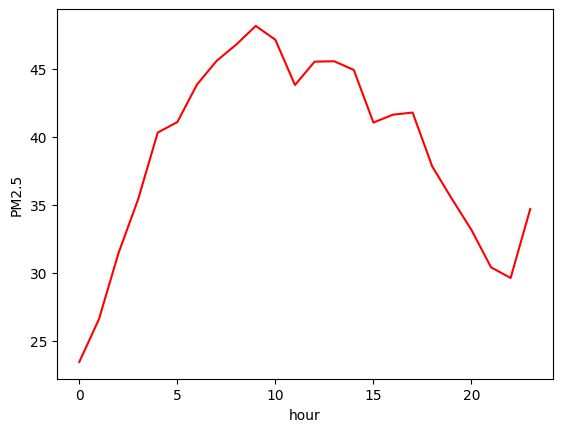

In [12]:
import matplotlib.pyplot as plt
x = 'hour'
y = 'PM2.5'

plt.plot(data[x],data[y], 'r-')
plt.xlabel(x)
plt.ylabel(y)

Text(0, 0.5, 'humidity')

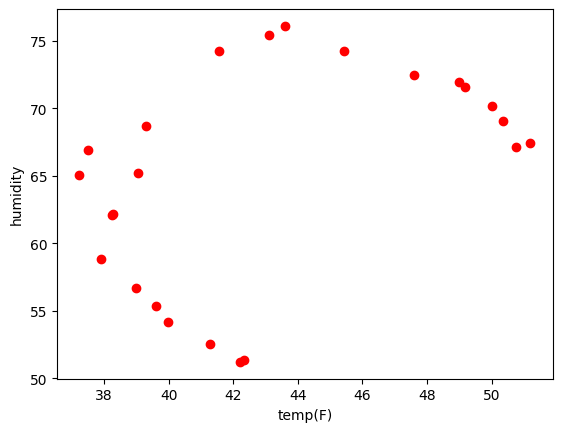

In [13]:
import matplotlib.pyplot as plt
x = 'temp(F)'
y = 'humidity'

plt.scatter(data[x],data[y],c='r')
plt.xlabel(x)
plt.ylabel(y)

In [14]:
data[data['temp(F)']==data['temp(F)'].min()]

,hour,temp(F),humidity,AQI,PM1,PM2.5,PM10
9,9,37.233333,65.066667,132.166667,30.25,48.140333,61.433


In [15]:
data[data['temp(F)']==data['temp(F)'].max()]

,hour,temp(F),humidity,AQI,PM1,PM2.5,PM10
21,21,51.2,67.433333,89.433333,19.027333,30.403,34.746


In [35]:
# Let's make a function that can do this all
import os
import pandas as pd
import matplotlib.pyplot as plt

def calculate_aqi():
  year = input("enter year: ")
  if year == 'exit' or year == 'Exit':
    return None
  month = input("enter month: ")
  date =input("enter date: ")

  file_name = 'clean_'+year+month+date+'.csv'

  filelist = os.listdir
  try:
    data = pd.read_csv(file_name,index_col=None)
  except:
    print("Wrong input. \n\n Try Again! \n")
    return calculate_aqi()



  PM25=data['PM2.5'].mean()
  PM10=data['PM10'].mean()
  print("AQI based on PM2.5 is: ",PM25_aqi(PM25))
  print("AQI based on PM10  is: ",PM10_aqi(PM10))
  print("AQI for the day is the maximum of these two.")
  print("So, AQI for the day is :", max(PM25_aqi(PM25),PM10_aqi(PM10)))


  x = 'hour'
  y = 'PM2.5'

  plt.plot(data[x],data[y], 'r-')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

  x = 'temp(F)'
  y = 'humidity'

  plt.scatter(data[x],data[y],c='r')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

  return calculate_aqi()

enter year: 215
enter month: 545
enter date: 485
Wrong input. 

 Try Again! 

enter year: 2021
enter month: 12
enter date: 24
AQI based on PM2.5 is:  109.51511205452552
AQI based on PM10  is:  44.66444852419469
AQI for the day is the maximum of these two.
So, AQI for the day is : 109.51511205452552


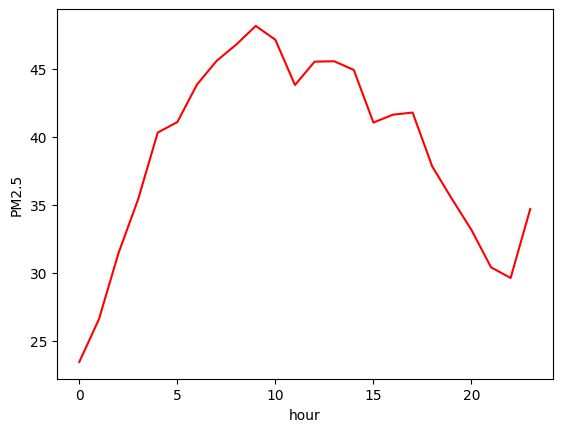

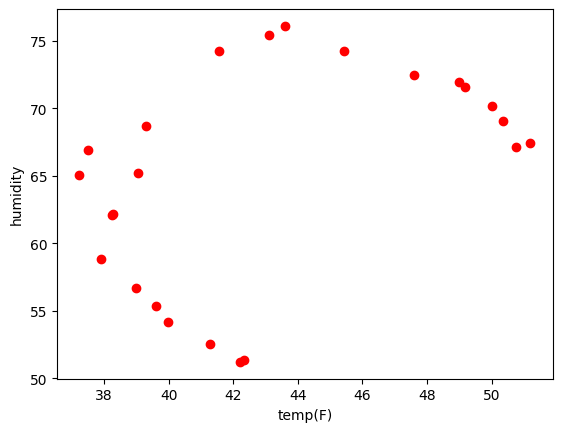

enter year: exit


In [36]:
calculate_aqi()

In [ ]:
215
21